In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
trian_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

In [ ]:
trian_df.head()
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
y_train = trian_df['label']#Extracting the Labels
y_test = test_df['label']
del trian_df['label']
del test_df['label']


In [ ]:
#Extracting the Images

x_trian = trian_df.values
x_test = test_df.values


In [ ]:
#Summarizing the Training and Validation Data
x_trian.shape


(27455, 784)

In [ ]:
y_train.shape


(27455,)

In [ ]:
x_test.shape


(7172, 784)

In [ ]:
y_test.shape

(7172,)

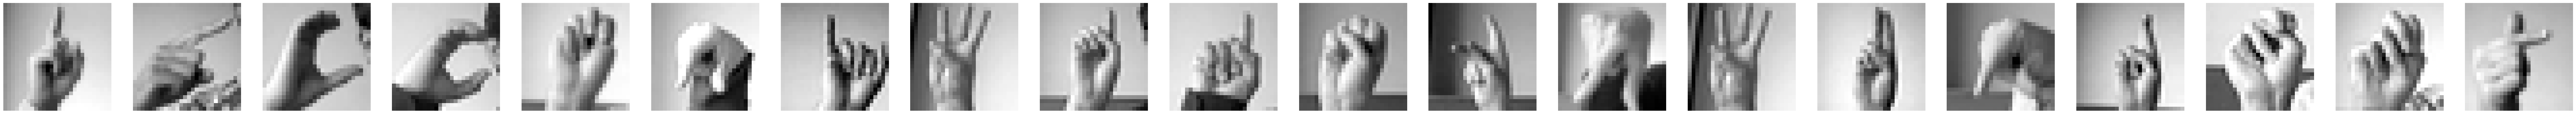

In [ ]:
plt.figure(figsize = (100,100))
num_image = 20
for i in range(num_image):
  row = x_trian[i]
  label = y_train[i]
  image = row.reshape(28,28)
  plt.subplot(1, num_image, i+1)
  plt.axis("off")
  plt.imshow(image, cmap = 'gray')

In [ ]:
x_trian.min()
x_trian.max()
x_trian = x_trian /255
x_test = x_test / 255
print(len(y_train))

27455


In [ ]:
num_clas = 25
y_train = keras.utils.to_categorical(y_train, num_clas)
y_test = keras.utils.to_categorical(y_test, num_clas)

In [23]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape= (784,)))
# model.add(Dense(512, activation = 'relu'))
model.add(Dense(num_clas, activation = 'softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 25)                12825     
                                                                 
Total params: 414,745
Trainable params: 414,745
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')

In [17]:
model.fit(x_trian, y_train, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
76/76 [==============================] - 2s 21ms/step - loss: nan - accuracy: 0.0492 - val_loss: nan - val_accuracy: 0.0430
Epoch 2/5
76/76 [==============================] - 1s 17ms/step - loss: nan - accuracy: 0.0439 - val_loss: nan - val_accuracy: 0.0430
Epoch 3/5
76/76 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.0439 - val_loss: nan - val_accuracy: 0.0430
Epoch 4/5
76/76 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.0439 - val_loss: nan - val_accuracy: 0.0430
Epoch 5/5
76/76 [==============================] - 1s 17ms/step - loss: nan - accuracy: 0.0439 - val_loss: nan - val_accuracy: 0.0430


In [27]:
y_pred = model.predict(x_test)

76/76 [==============================] - 0s 3ms/step


In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

ValueError: ignored